In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from pprint import pprint
data_folder = '../data/%s'

In [2]:
df_train = pd.read_csv(data_folder % 'train.csv')

/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# df_train.describe()
df_train.replace('-',np.nan).replace('--',np.nan).isnull().any()

rid                False
estateNameCN        True
estateNameEN        True
districtL          False
districtS           True
lat                False
lng                False
tid                False
rid.1              False
address            False
transcationDate    False
princeInHKD         True
trans_change        True
SFA                 True
GFA                 True
unitPriceSFA        True
unitPriceGFA        True
contract            True
dtype: bool

In [84]:
df_train.head()

,rid,estateNameCN,estateNameEN,districtL,districtS,lat,lng,tid,rid.1,address,transcationDate,princeInHKD,trans_change,SFA,GFA,unitPriceSFA,unitPriceGFA,contract
0,10400,兆安苑,Siu On Court,New Territories,Tuen Mun,22.389256,113.976318,MTA0MDAyMDE0LTA0LTA5LS0yNTIwMDAwLjA=,10400,TING MAN HOUSE--BLOCK E 2/F Room 6,2014-04-09,2520000.0,+163%,--,591,-,4264.0,Agreement
1,10400,兆安苑,Siu On Court,New Territories,Tuen Mun,22.389256,113.976318,MTA0MDAyMDE0LTA0LTAyLS0yNjAwMDAwLjA=,10400,TING LOK HOUSE--BLOCK A 6/F Room 2,2014-04-02,2600000.0,+57%,--,591,-,4399.0,Agreement
2,10400,兆安苑,Siu On Court,New Territories,Tuen Mun,22.389256,113.976318,MTA0MDAyMDE0LTA0LTE2LS0yOTMwMDAwLjA=,10400,TING ON HOUSE--BLOCK H 1#/F Room 4,2014-04-16,2930000.0,+49%,--,672,-,4360.0,Agreement
3,10400,兆安苑,Siu On Court,New Territories,Tuen Mun,22.389256,113.976318,MTA0MDAyMDE0LTA1LTA5LS0yNzAwMDAwLjA=,10400,TING HOI HOUSE--BLOCK K 1#/F Room 4,2014-05-09,2700000.0,--,--,672,-,4018.0,Agreement
4,10400,兆安苑,Siu On Court,New Territories,Tuen Mun,22.389256,113.976318,MTA0MDAyMDE0LTA1LTI2LS0yMzkwMDAwLjA=,10400,TING KAY HOUSE--BLOCK J 1/F Room 3,2014-05-26,2390000.0,+241%,--,672,-,3554.0,Agreement


In [80]:
# cleaning
df_train = df_train.replace('--',np.nan).replace('-',np.nan)
df_train.drop('rid.1', axis=1, inplace=True)
'finished'

'finished'

In [32]:
LABEL = 'princeInHKD'
df_label = df_train[LABEL]
df_label.isnull().any()

True

In [78]:
df_train = df_train.dropna(subset=[LABEL])
df_train[LABEL] = df_train[LABEL].astype('float64')

# Load data 

In [3]:
# df_train.to_csv('data/mytrain3.csv',index=False,encoding='utf_8_sig')
LABEL = 'princeInHKD'
df_train = pd.read_csv(data_folder % 'mytrain3.csv')
# df_train

/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.isnull().any()

rid                False
estateNameCN        True
estateNameEN        True
districtL          False
districtS           True
lat                False
lng                False
tid                False
address            False
transcationDate    False
princeInHKD        False
trans_change        True
SFA                 True
GFA                 True
unitPriceSFA        True
unitPriceGFA        True
contract            True
dtype: bool

In [5]:
df_label = df_train[[LABEL]]
df_label.isnull().any()

princeInHKD    False
dtype: bool

In [6]:
df_label[LABEL] = df_label[LABEL].astype('float64')

/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_label.dtypes

princeInHKD    float64
dtype: object

In [8]:
df_label[LABEL].describe()

count    5.198820e+05
mean     6.148868e+06
std      1.080441e+07
min      1.000000e+04
25%      2.850000e+06
50%      4.300000e+06
75%      6.660000e+06
max      1.000000e+09
Name: princeInHKD, dtype: float64

/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


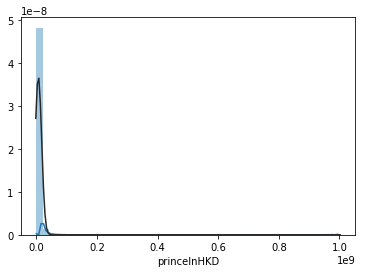

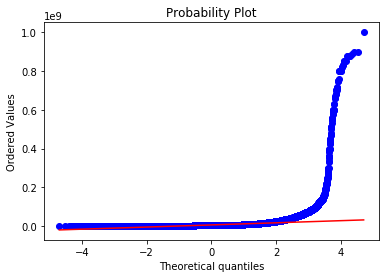

In [9]:
sns.distplot(df_label[LABEL], fit=norm)
fig = plt.figure()
res = stats.probplot(df_label[LABEL], plot=plt)

In [10]:
df_train[LABEL] = np.log(df_train[LABEL].astype('float64'))

In [11]:
# sns.distplot(test_label, fit=norm)
# fig = plt.figure()
# res = stats.probplot(test_label, plot=plt)
df_train.dtypes

rid                  int64
estateNameCN        object
estateNameEN        object
districtL           object
districtS           object
lat                float64
lng                float64
tid                 object
address             object
transcationDate     object
princeInHKD        float64
trans_change        object
SFA                 object
GFA                 object
unitPriceSFA       float64
unitPriceGFA       float64
contract            object
dtype: object

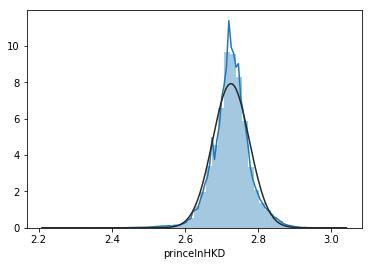

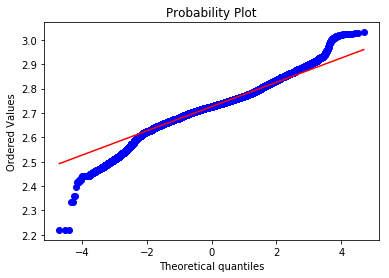

In [12]:
test_label = np.log(df_train[LABEL])
sns.distplot(test_label, fit=norm)
fig = plt.figure()
res = stats.probplot(test_label, plot=plt)

# Nov 29th

In [4]:
df_train = df_train[['estateNameCN', 'estateNameEN', 'districtL', 'districtS', 'lat',
       'lng', 'address', 'transcationDate', 'princeInHKD',
       'trans_change', 'SFA', 'GFA', 'unitPriceSFA', 'unitPriceGFA']]
pprint(df_train.isnull().any())
pprint(df_train.dtypes)

estateNameCN        True
estateNameEN        True
districtL          False
districtS           True
lat                False
lng                False
address            False
transcationDate    False
princeInHKD        False
trans_change        True
SFA                 True
GFA                 True
unitPriceSFA        True
unitPriceGFA        True
dtype: bool
estateNameCN        object
estateNameEN        object
districtL           object
districtS           object
lat                float64
lng                float64
address             object
transcationDate     object
princeInHKD        float64
trans_change        object
SFA                 object
GFA                 object
unitPriceSFA       float64
unitPriceGFA       float64
dtype: object


In [5]:
df_train['transcationDate'] = pd.to_datetime(df_train['transcationDate'])
# df_sort_time = df_train.set_index(['transcationDate']).sort_index()
df_sort_time = df_train.copy()

In [6]:
df_sort_time['estateName'] = df_sort_time['estateNameEN'].fillna('#') + '&' + df_sort_time['estateNameCN'].fillna('#')
df_sort_time['estateName'] = df_sort_time['estateName'].str.\
                                            replace('#&#','').str.\
                                            replace('&#','').str.\
                                            replace('#&','')

df_sort_time['estateName'] = df_sort_time['estateName'].replace('',np.nan)
df_sort_time['estateName']

0          Siu On Court&兆安苑
1          Siu On Court&兆安苑
2          Siu On Court&兆安苑
3          Siu On Court&兆安苑
4          Siu On Court&兆安苑
5          Siu On Court&兆安苑
6          Siu On Court&兆安苑
7          Siu On Court&兆安苑
8          Siu On Court&兆安苑
9          Siu On Court&兆安苑
10         Siu On Court&兆安苑
11         Siu On Court&兆安苑
12         Siu On Court&兆安苑
13         Siu On Court&兆安苑
14         Siu On Court&兆安苑
15         Siu On Court&兆安苑
16         Siu On Court&兆安苑
17         Siu On Court&兆安苑
18         Siu On Court&兆安苑
19         Siu On Court&兆安苑
20         Siu On Court&兆安苑
21         Siu On Court&兆安苑
22         Siu On Court&兆安苑
23         Siu On Court&兆安苑
24         Siu On Court&兆安苑
25         Siu On Court&兆安苑
26         Siu On Court&兆安苑
27         Siu On Court&兆安苑
28         Siu On Court&兆安苑
29         Siu On Court&兆安苑
                ...        
519852              MOD 595
519853              MOD 595
519854              MOD 595
519855              MOD 595
519856              

In [7]:
df_sort_time['lat/lng'] = df_sort_time['lat'].astype(str) + ',' + df_sort_time['lng'].astype(str)

In [8]:
len(df_sort_time['lat/lng'].unique().tolist()),len(df_sort_time['estateName'].unique().tolist())

(5787, 6040)

In [9]:
df_sort_time['address']

0           TING MAN HOUSE--BLOCK E 2/F Room 6
1           TING LOK HOUSE--BLOCK A 6/F Room 2
2           TING ON HOUSE--BLOCK H 1#/F Room 4
3          TING HOI HOUSE--BLOCK K 1#/F Room 4
4           TING KAY HOUSE--BLOCK J 1/F Room 3
5           TING CHI HOUSE--BLOCK F 7/F Room 8
6          TING KAY HOUSE--BLOCK J 1#/F Room 4
7           TING MAN HOUSE--BLOCK E 2/F Room 5
8            TING ON HOUSE--BLOCK H 8/F Room 5
9           TING MAN HOUSE--BLOCK E 8/F Room 4
10        TING PONG HOUSE--BLOCK D 1#/F Room 6
11         TING HOI HOUSE--BLOCK K 1#/F Room 2
12          TING YAU HOUSE--BLOCK B 2/F Room 8
13          TING HOI HOUSE--BLOCK K 3/F Room 4
14           TING ON HOUSE--BLOCK H 1/F Room 3
15         TING HEI HOUSE--BLOCK C 1#/F Room 3
16         TING KAY HOUSE--BLOCK J 1#/F Room 3
17          TING ON HOUSE--BLOCK H 1#/F Room 2
18          TING YAU HOUSE--BLOCK B 3/F Room 7
19         TING CHI HOUSE--BLOCK F 1#/F Room 6
20         TING YAU HOUSE--BLOCK B 1#/F Room 1
21         TI

In [10]:

# rex_cn = '(\d+)(樓)'
# rex_en = '(\d+)(#*/[F])'
# rex_mix = '(\d+#*/[F])|(\d+樓)'
rex_cn = '(\d+)(B*樓)'
rex_en = '(\d+)(#*/[F])'
rex_mix = '(\d+#*/[F])|(\d+B*樓)'
s_first_rex = df_sort_time['address'].str.extract(rex_mix, expand=True)
floor_en = s_first_rex[0].str.extract(rex_en, expand=True)[0]
floor_cn = s_first_rex[1].str.extract(rex_cn, expand=True)[0]

# floor_cn[~floor_cn.isnull()]
# df_sort_time.loc['2018-09-08 ']['address'].extract('(\d+樓)')

In [11]:
rex_cn = '(G+)(樓)'
rex_en = '(G+)(#*/[F])'
rex_mix = '(G+#*/[F])|(G+樓)'
s_first_rex = df_sort_time['address'].str.extract(rex_mix, expand=True)
floor_en_G = s_first_rex[0].str.extract(rex_en, expand=True)[0]
floor_cn_G = s_first_rex[1].str.extract(rex_cn, expand=True)[0]

In [12]:

floor = floor_cn.fillna('') + floor_en.fillna('') + floor_en_G.fillna('') + floor_cn_G.fillna('') 
floor = floor.replace('',np.nan)
df_sort_time.loc[floor[floor.isnull()].index]
df_sort_time['floor'] = floor

In [13]:
df_1203 = df_sort_time[~df_sort_time['floor'].isnull()]
# df_1203 = df_1203[~(df_1203['SFA'].isnull() & df_1203['unitPriceSFA'].isnull())]
df_sfa =  df_1203[~(df_1203['SFA'].isnull() & df_1203['unitPriceSFA'].isnull())]
df_gfa = df_1203[~(df_1203['GFA'].isnull() & df_1203['unitPriceGFA'].isnull())]

len(df_gfa),len(df_sfa)

(447226, 345802)

In [26]:
df_in_latlng = df_1203.set_index(['lat/lng'])
df_in_latlng = df_in_latlng[~df_in_latlng['estateName'].isnull()]
# len(df_in_latlng)
# df_in_latlng_no_re = df_in_latlng[~df_in_latlng.index.duplicated(keep='first')]
df_in_latlng_no_re = df_in_latlng

In [28]:
df_in_rere = df_in_latlng_no_re.reset_index()
df_in_rere = df_in_rere[[ 'lat/lng',  'districtL',
       'districtS', 'transcationDate', 'princeInHKD', 'SFA', 'GFA', 'unitPriceSFA', 'unitPriceGFA',
       'estateName', 'floor']]
df_in_rere.to_csv(data_folder % 'train_after_clean.csv',index=False)

In [72]:
df_in_latlng_name = df_in_latlng_no_re[['estateName']]
# df_in_latlng_name['']
df_in_latlng_name = df_in_latlng_name.reset_index().set_index('estateName')
df_in_latlng_name['lat'] = df_in_latlng_name['lat/lng'].str.split(',',expand=True)[0]
df_in_latlng_name['lng'] = df_in_latlng_name['lat/lng'].str.split(',',expand=True)[1]

df_in_latlng_name = df_in_latlng_name[['lat','lng']]
# df_in_latlng_name
# len(df_in_latlng_name['estateName'].unique())

In [73]:
lldict = df_in_latlng_name.reset_index().set_index('estateName').T.to_dict('list')


/Users/haomao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [74]:
all_lines = ''
for k,v in lldict.items():
    c_line = k + '#' + lldict[k][0] + ','+ lldict[k][1]+ '\n'
    all_lines += c_line
    
with open(data_folder % 'geo_file.txt','w') as f:
    f.write(all_lines)
    
f.close()